In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using the KMeans from sklearn
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('driver-data.csv')

In [3]:
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
data.shape

(4000, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [6]:
# To check the null values:
data.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [7]:
# To check the duplicate values in the dataset:
data.duplicated().sum()

0

In [8]:
# dropping the id column:
data = data.drop(['id'],axis=1)

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_dist_day,4000.0,76.041523,53.469563,15.52,45.2475,53.33,65.6325,244.79
mean_over_speed_perc,4000.0,10.721000,13.708543,0.00,4.0000,6.00,9.0000,100.00


In [10]:
# Exploratory Data analysis:

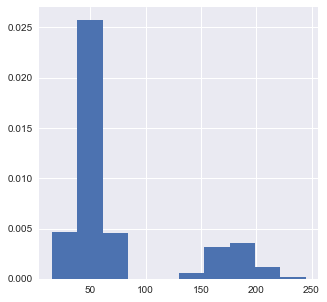

In [11]:
plt.figure(figsize=(5,5))
plt.hist(data['mean_dist_day'],density=True)
plt.show()

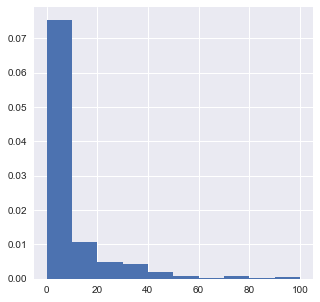

In [12]:
plt.figure(figsize=(5,5))
plt.hist(data['mean_over_speed_perc'],density=True)
plt.show()

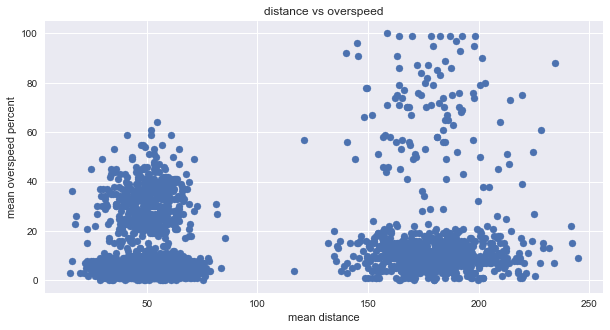

In [13]:
# Bi -variate analysis:

plt.figure(figsize=(10,5))
plt.scatter(x = data['mean_dist_day'],y = data['mean_over_speed_perc'])
plt.xlabel('mean distance')
plt.ylabel('mean overspeed percent')
plt.title('distance vs overspeed')
plt.show()

In [14]:
data.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [15]:
#elbow method--> input --> numpy array 

wcss = []

for n in np.arange(1,5):
    km = KMeans(n_clusters=n, random_state = 42) # how do we find out the optimum clusters  # elbow methods 
    km.fit(data)
    wcss.append(km.inertia_)

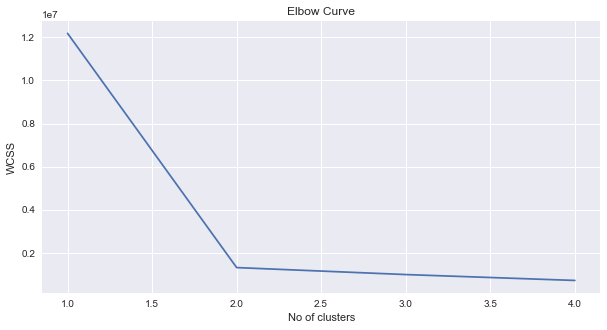

In [16]:
plt.figure(figsize= (10,5))
plt.plot(np.arange(1,5), wcss)
plt.grid(True)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Curve")
plt.show()

In [17]:
final_km = KMeans(n_clusters = 2, random_state = 42 )
final_km.fit(data)

KMeans(n_clusters=2, random_state=42)

In [18]:
y_kmeans = final_km.predict(data)
print(y_kmeans)

[0 0 0 ... 1 1 1]


In [19]:
print(final_km.cluster_centers_)

[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [39]:
# From the K-means clustering there exists two distinct clusters which is evident from the elbow plot.